# YOLOv7

### Implicit Knowledge

Implicit Knowledge (kiến thức tiềm ẩn) được giới thiệu và áp dụng lần đầu vào Object Detection ở trong YOLOR.

Nói ngắn gọn, con người thì có thể hiểu một sự vật, sự việc thông qua việc học trực tiếp nó (explicit knowledge) hoặc cũng có thể tự mình hiểu được nó mà không phải trực tiếp học về nó thông qua vô số các kinh nghiệm từ trước (implicit knowledge)

YOLOR muốn đưa implicit knowledge đó vào trong mạng nơ-ron. YOLOR lúc này định nghĩa explicit knowledge là những kiến thức mà model học được thông qua sự tiếp xúc với các input, còn implicit knowledge là một thứ gì đó mà model sẽ tự rút ra được trong quá trình training, độc lập với input.
YOLOR đề xuất ra 3 cách biểu diễn implicit knowledge, tuy nhiên biểu diễn đơn giản nhất, dưới dạng vector, được YOLOR sử dụng và đạt hiệu quả ổn.
Implicit knowledge được kết hợp vào mạng nơ-ron theo 2 cách, cộng và nhân

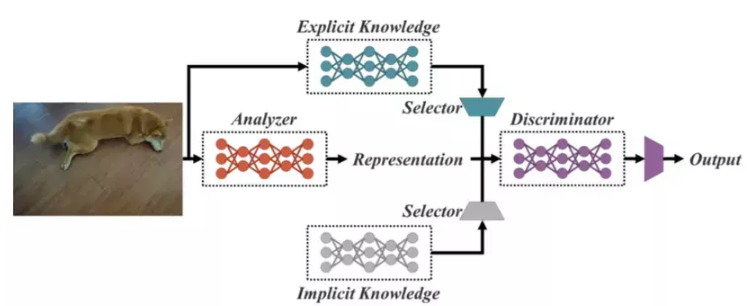

### Deep Supervision (Auxiliary head)

Deep supervision là một kỹ thuật phổ biến trong bài toán Segmentation, xuất phát từ mô hình Inception Network. Kỹ thuật này thêm các "head" ảo từ các lớp sâu của mô hình, buộc mô hình phải dự đoán từ những lớp này. Nguyên lý cơ bản của deep supervision vẫn chưa được hiểu rõ, nhưng giả thuyết cho rằng việc này có thể giúp mô hình học các đặc trưng cần thiết từ các lớp sâu hơn một cách nhanh chóng và hiệu quả hơn.

Một giả thuyết khác là việc dự đoán từ các lớp sâu tạo ra thông tin multi-scale, giống như một FPN, giúp mô hình học các đặc trưng ở nhiều tỉ lệ không gian khác nhau một cách dễ dàng hơn. Đồng thời, deep supervision cũng có thể được coi là việc huấn luyện hai mô hình trong một quá trình.

Trong quá trình inference, auxiliary head được loại bỏ và chỉ sử dụng head gốc để dự đoán kết quả.

### Áp dụng Optimal Transport cho Label Assignment

### Simple OTA

### Architecture

#### Backbone

##### Elan Block

YOLOv7 sử dụng backbone là ELAN (Efficient Layer Aggregation Network). Vì paper ELAN được nhắc tới trong YOLOv7 là một paper ẩn, nên không có thông tin chi tiết về ELAN. Tuy nhiên, theo như tên gọi, ELAN có thể là một mạng được thiết kế để kết hợp các layer một cách hiệu quả.

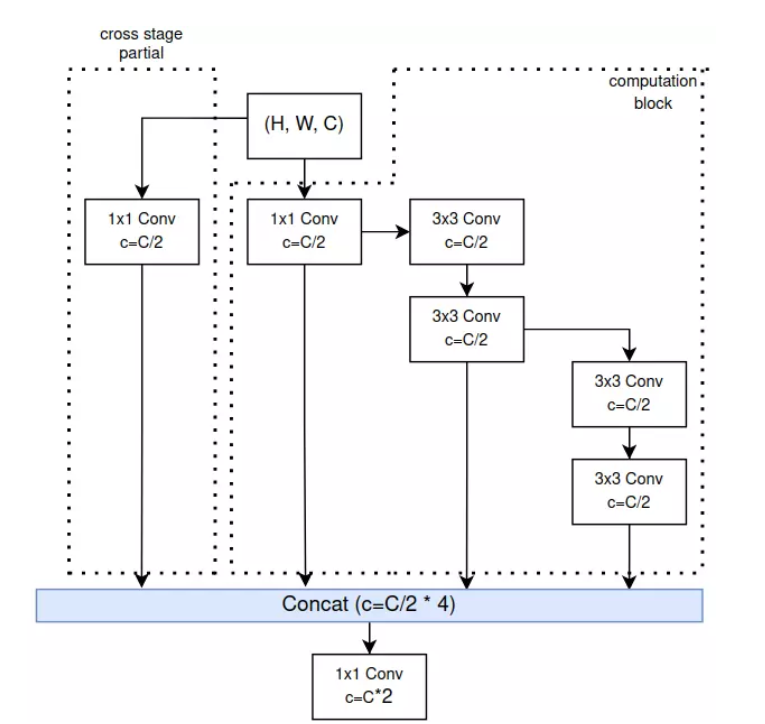

Một ELAN block gồm 3 phần: Cross Stage Partial, Computation Block và phép PointWiseConv. Thiết kế của ELAN Block chịu ảnh hưởng từ 2 nghiên cứu trước đó là CSPNet và VoVNet.

##### Transition Block

Các ELAN Block được kết nối với nhau thông qua các Transition Block. Mỗi block sẽ giảm kích cỡ của feature map đi 2 lần

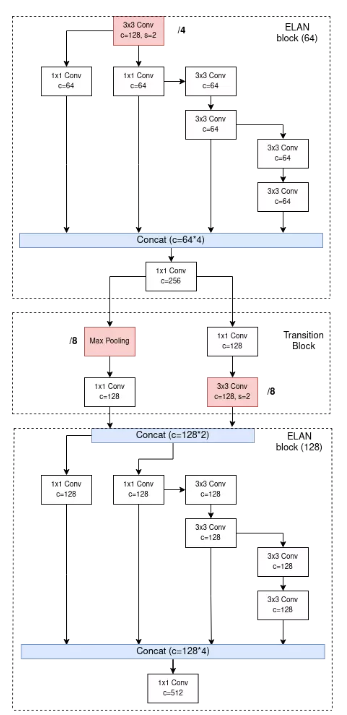

 Điều này giúp mô hình có khả năng tổng hợp thông tin từ các tầng khác nhau và tạo ra các feature maps có độ phân giải thấp hơn, nhưng vẫn giữ được thông tin quan trọng cho việc phát hiện đối tượng

##### Stem

Trước khi tiến vào ELAN Block đầu tiên trong backbone, ảnh đầu vào sẽ đi qua Stem Block

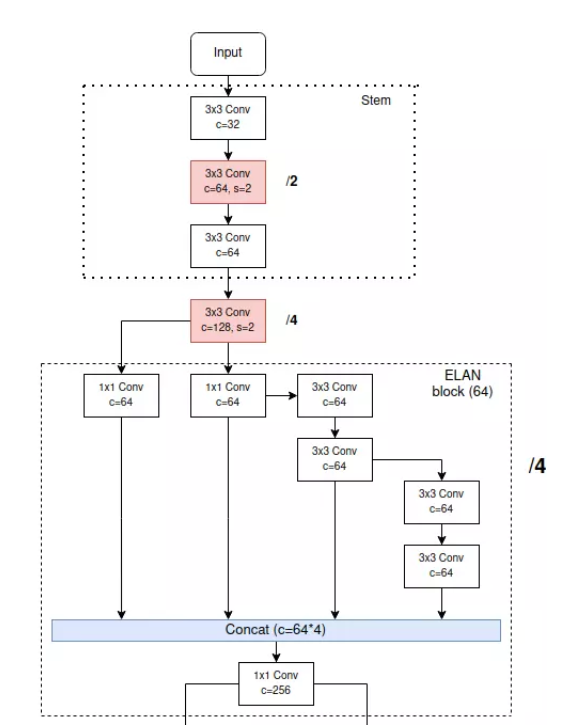

Nó thường bao gồm các lớp Convolutional để trích xuất đặc trưng và chuẩn bị feature maps cho quá trình phát hiện đối tượng. Stem Block giúp giảm thiểu thông tin không cần thiết và tăng cường các đặc trưng quan trọng cho việc phân loại và phát hiện vị trí của các đối tượng trong ảnh

#### Neck

##### SPPCSPC

SPP lần đầu được áp dụng vào YOLOv4, và được cải tiến thành SPPF ở trong YOLOv5

Còn trong YOLOv7, SPP tiếp tục được CSP hóa, kiến trúc của SPPCSPC:

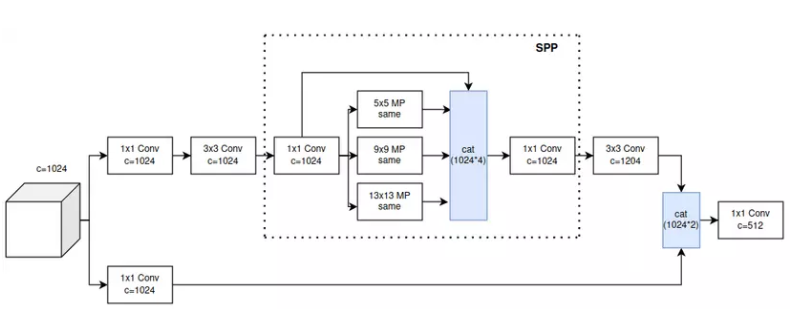

Cấu trúc này giúp tăng cường khả năng trích xuất đặc trưng của mô hình thông qua việc sử dụng các lớp pooling với kích thước khác nhau để thu thập thông tin từ nhiều phạm vi không gian khác nhau, đồng thời giảm số lượng tham số và tăng hiệu quả tính toán

##### PANet

PANet là một phiên bản mở rộng của FPN (Feature Pyramid Network). PANet lần đầu được áp dụng trong họ nhà YOLO là YOLOv4

Ở YOLOv7, toán tử cộng để kết hợp 2 feature maps từ 2 scale vào với nhau đã được thay thế bằng toán tử concatenate. Hơn nữa, sau khi kết hợp với feature maps từ scale trên, sinh ra một feature maps trung gian, feature maps trung gian này tiếp tục được xử lý bằng CSP-OSA module thay vì được tiếp tục kết hợp thẳng với feature maps từ scale dưới như FPN hay PANet

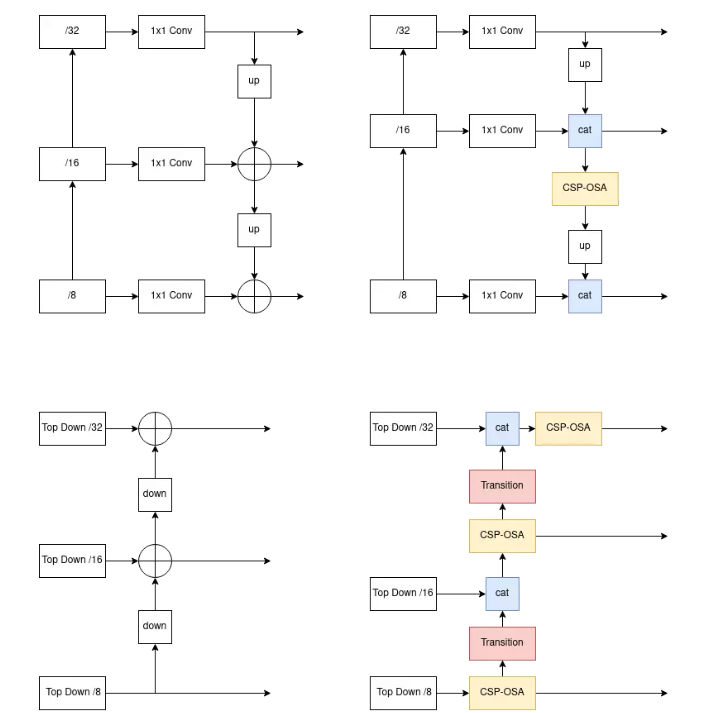

Sự khác biệt của (CSP-OSA)PANet (phải) so với PANet thông thường (trái). Trong Top Down pathway của PANet thông thường (trên trái) chỉ là một FPN, các feature maps từ backbone ở scale phía trên được kết hợp trực tiếp với scale phía dưới mà không thông qua bất kì sự xử lý nào thêm. Còn trong Top Down pathway của YOLOv7, feature maps từ scale /16 sau khi được kết hợp với feature maps từ scale /8 sẽ được xử lý thêm thông qua CSP-OSA module rồi mới kết hợp với scale /8. Điều tương tự cũng xảy ra với Bottom Up pathway của YOLOv7, feature maps từ scale dưới sẽ được đi qua CSP-OSA để xử lý, và downsample thông qua Transition Block mà mình đã nói ở trên backbone thay vì là 3x3 Conv như PANet thông thường.

Ngoài ra nó có sự tương đồng khá giống với CSP:

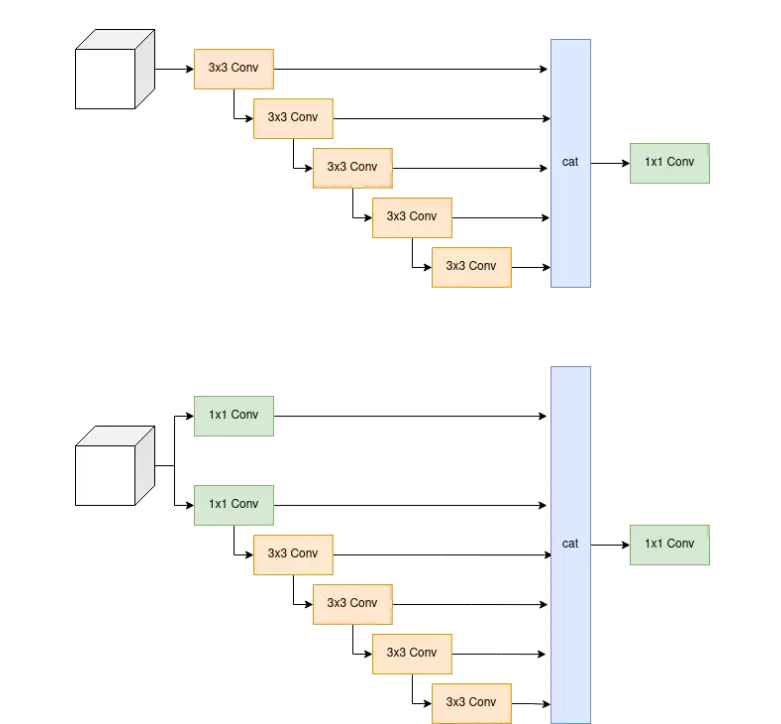

Bên trên là OSA module thông thường trong VoVNet, bên dưới là CSP-OSA module sử dụng trong neck của YOLOv7

#### RepConv

Các feature maps từ các scale khác nhau sau đi đưa qua FPN hay PANet sẽ được xử lý thêm với Conv 3x3 với từng scale. Còn trong Neck của YOLOv7, việc xử lý này sẽ được thực hiện bởi RepConv, một module với tốc độ của Convolutional Layer nhanh hơn, giúp tăng tốc độ tính toán và giảm số lượng tham số. RepConv sử dụng kĩ thuật Re-param để có một module tốc độ cao mà độ chính xác cũng cao

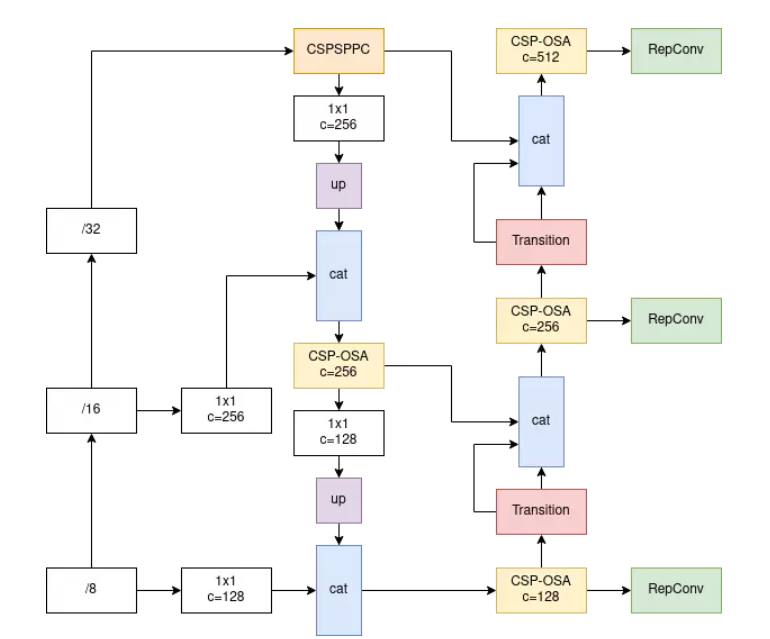